In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import argmax
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Convolution2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential

In [2]:
image_size = (128,128)
batch_size = 50

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/home/karol/python_projekty/cv2/sudoku/data/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/home/karol/python_projekty/cv2/sudoku/data/test",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 8000 files belonging to 10 classes.
Using 6400 files for training.
Found 2000 files belonging to 10 classes.
Using 400 files for validation.


2022-02-02 19:31:27.212639: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-02 19:31:27.243111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-02 19:31:27.243309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-02 19:31:27.243885: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
data_augmentation = keras.Sequential(
    [
        layers.RandomRotation(0.08),
    ]
)

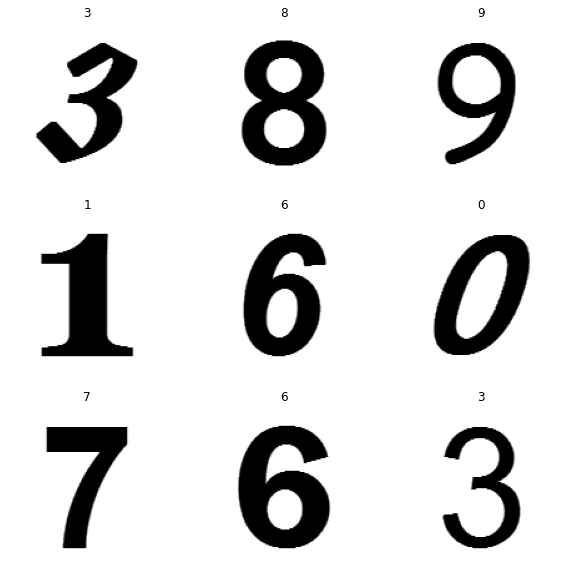

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

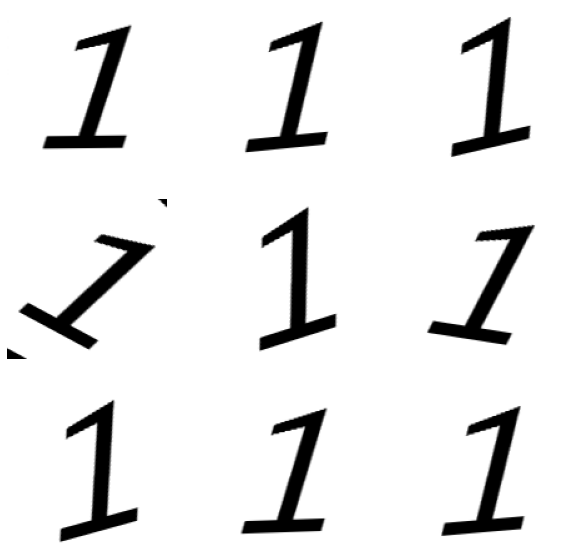

In [5]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

plt.show()

In [11]:
layers = \
  [ Convolution2D(128, 3, 3, input_shape=(128, 128, 3), activation='relu')
  , Convolution2D(64, 2, 1, activation='relu')
  , Convolution2D(32, 2, 1, activation='relu')
  , Convolution2D(16, 2, 1, activation='relu')
  , MaxPooling2D(pool_size=(2, 2))
  , MaxPooling2D(pool_size=(2, 2))
  , Flatten()
  , Dense(1024, activation='relu')
  , Dropout(0.5)
  , Dense(512, activation='relu')
  , Dropout(0.5)
  , Dense(10)
  , Activation('softmax')
  ]

model = Sequential()
for layer in layers:
    model.add(layer)

In [12]:
callbacks = [
    keras.callbacks.ModelCheckpoint("/home/karol/python_projekty/cv2/sudoku/models/save_at_{epoch}.h5"),
]
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_ds, epochs=12, batch_size=6, validation_data=val_ds, callbacks=callbacks)

Epoch 1/12
128/128 [==============================] - 3s 21ms/step - loss: 1.6014 - accuracy: 0.7486 - val_loss: 0.1390 - val_accuracy: 0.9550
Epoch 2/12
128/128 [==============================] - 3s 21ms/step - loss: 0.2023 - accuracy: 0.9367 - val_loss: 0.1126 - val_accuracy: 0.9625
Epoch 3/12
128/128 [==============================] - 3s 21ms/step - loss: 0.1391 - accuracy: 0.9569 - val_loss: 0.1087 - val_accuracy: 0.9575
Epoch 4/12
128/128 [==============================] - 3s 21ms/step - loss: 0.0957 - accuracy: 0.9689 - val_loss: 0.1394 - val_accuracy: 0.9625
Epoch 5/12
128/128 [==============================] - 3s 21ms/step - loss: 0.0920 - accuracy: 0.9714 - val_loss: 0.0817 - val_accuracy: 0.9750
Epoch 6/12
128/128 [==============================] - 3s 21ms/step - loss: 0.0757 - accuracy: 0.9783 - val_loss: 0.1288 - val_accuracy: 0.9625
Epoch 7/12
128/128 [==============================] - 3s 20ms/step - loss: 0.0466 - accuracy: 0.9844 - val_loss: 0.0738 - val_accuracy: 0.9775

In [8]:
img = keras.preprocessing.image.load_img(
    "/home/karol/python_projekty/cv2/sudoku/data/test/2/img003-00005.png", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(argmax(predictions))

2
